In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_file = "digit-recognizer/train.csv"
raw_data = pd.read_csv(train_file)

In [17]:
num_classes = 10
img_rows,img_cols = 28,28
def data_prep(raw):
    out_y = keras.utils.to_categorical(raw.label,num_classes) #to_categorical acts like onehotencoder
    
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:] # excluding label column
    x_shaped_array = x_as_array.reshape(num_images,imr_rows,img_cols,1) #converting 4D
    out_x = x_shaped_array/255
    return out_x,out_y

In [18]:
x,y = data_prep(raw_data)

model = keras.models.Sequential([
    keras.layers.Conv2D(20,kernel_size=(3,3),
                activation='relu',
                input_shape=(img_rows,img_cols,1)),
    keras.layers.Conv2D(20,kernel_size=(3,3),activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(num_classes,activation='softmax')
])
# 20,20,128 is number of filters

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x, y,
          batch_size=128,
          epochs=2,
          validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/2
33600/33600 [==============================] - 50s 1ms/sample - loss: 0.2384 - accuracy: 0.9309 - val_loss: 0.0798 - val_accuracy: 0.9744
Epoch 2/2
33600/33600 [==============================] - 48s 1ms/sample - loss: 0.0627 - accuracy: 0.9814 - val_loss: 0.0589 - val_accuracy: 0.9820


In [20]:
#using stride
model = keras.models.Sequential([
    keras.layers.Conv2D(20,kernel_size=(3,3),
                activation='relu',
                input_shape=(img_rows,img_cols,1)),
    keras.layers.Conv2D(20,kernel_size=(3,3),activation='relu',strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(num_classes,activation='softmax')
])

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x, y,
          batch_size=128,
          epochs=2,
          validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/2
33600/33600 [==============================] - 32s 963us/sample - loss: 0.3141 - accuracy: 0.9115 - val_loss: 0.1011 - val_accuracy: 0.9688
Epoch 2/2
33600/33600 [==============================] - 32s 954us/sample - loss: 0.0848 - accuracy: 0.9750 - val_loss: 0.0704 - val_accuracy: 0.9774


Stride shrinks the image,makes model faster, it reduce overfitting problem

# Another approach

In [4]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

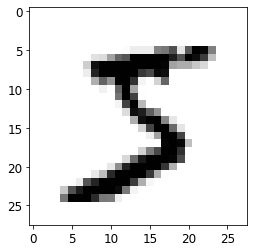

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()
print(X_train[0])

In [8]:
X_train = keras.utils.normalize(X_train,axis=1)
X_test = keras.utils.normalize(X_test,axis=1)

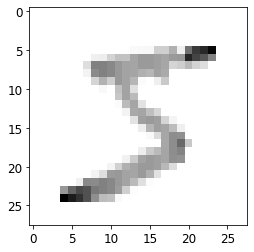

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()
print(X_train[0]) #value between 0 and 1

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.fit(X_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 9s 151us/sample - loss: 0.2638 - accuracy: 0.9225
Epoch 2/3
60000/60000 [==============================] - 9s 146us/sample - loss: 0.1090 - accuracy: 0.9660
Epoch 3/3
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0733 - accuracy: 0.9770


In [12]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(val_loss,val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.10455775497676804 0.9675
